In [1]:
import os
import numpy as np
import sys
BASE_DIR = '/home/aqts/yangHong/first-spam-experiment/'
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
#get text email dataset, which is equal to the image email datset
TEXT_DATA_DIR = os.path.join(BASE_DIR, 'data/hybrid_email_dataset_noequal/text/')
print(TEXT_DATA_DIR)
MAX_SEQUENCE_LENGTH = 500
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 200

nb_filters = 256
hiden_lstm_layer = 256

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.200d.txt'), encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# second, prepare text samples and their labels
print('Processing text dataset')

texts = []  # list of text samples
labels_index = {'ham':0, 'spam':1}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
                        
count = 0
for folder in sorted(os.listdir(TEXT_DATA_DIR)):
    path = os.path.join(TEXT_DATA_DIR, folder)
    for fname in sorted(os.listdir(path)):
        if fname is not None:
            fpath = os.path.join(path, fname)
            args = {} if sys.version_info < (3,) else {'encoding': 'latin-1'}
            with open(fpath, **args) as f:
                t = f.read()
                i = t.find('Subject:')  # skip header
                if 0 < i:
                    t = t[i:]
                texts.append(t)
                count+=1
                print(count,":",t[0:30])
            if folder =='ham':
                labels.append(0)
                print('ham')
            else:
                labels.append(1)
                print('spam')
# print('Process text dataset done')
# print('count:',count)

/home/aqts/yangHong/first-spam-experiment/data/hybrid_email_dataset_noequal/text/
Indexing word vectors.
Found 400000 word vectors.
Processing text dataset
1 : Subject: palm pilot request
je
ham
2 : Subject: invoice processing
as
ham
3 : Subject: north baja project
ac
ham
4 : Subject: long term outlook
fyi
ham
5 : Subject: account assignment li
ham
6 : Subject: pg & e deliveries
her
ham
7 : Subject: travel announcement
e
ham
8 : Subject: pac enrollment
last y
ham
9 : Subject: ferc gives guardian f
ham
10 : Subject: [ fwd : re : graco co
ham
11 : Subject: nymex info on desktop
ham
12 : Subject: competing pipelines
o
ham
13 : Subject: organizational announ
ham
14 : Subject: a few items from jean
ham
15 : Subject: cera says average nat
ham
16 : Subject: tw cash for fuel issu
ham
17 : Subject: cera says average nat
ham
18 : Subject: contact list
please f
ham
19 : Subject: capacity options on t
ham
20 : Subject: cost of service annou
ham
21 : Subject: a simple communicatio
ham
22 : Subject:

271 : Subject: c . a . focus meeting
ham
272 : Subject: calendar
here ' s the
ham
273 : Subject: transportation contra
ham
274 : Subject: matching gifts
enron 
ham
275 : Subject: if you arrange admini
ham
276 : Subject: preparing and commmun
ham
277 : Subject: nesa / hea 2001 techn
ham
278 : Subject: instructions for life
ham
279 : Subject: update on el paso ' s
ham
280 : Subject: available capacity
mo
ham
281 : Subject: tw 2001 weekend on - 
ham
282 : Subject: tw park and ride bill
ham
283 : Subject: = ? ansi _ x 3 . 4 - 
ham
284 : Subject: organizational announ
ham
285 : Subject: hot line request
joe 
ham
286 : Subject: january 4 th daily up
ham
287 : Subject: contract admin proced
ham
288 : Subject: ena org changes
enron
ham
289 : Subject: winter driving
please
ham
290 : Subject: eol webtext
here is m
ham
291 : Subject: eol docs
michelle : h
ham
292 : Subject: tw weekly 1 / 5 / 01

ham
293 : Subject: tw sale / hedge of un
ham
294 : Subject: ethink about it : 1 /
ham
295 : Subject: f

471 : Subject: updated q & as for en
ham
472 : Subject: attention : downtown 
ham
473 : Subject: tw pnr activity thru 
ham
474 : Subject: socal unbundling
at y
ham
475 : Subject: re : socal unbundling
ham
476 : Subject: el paso puts assets u
ham
477 : Subject: tw imbalance summary

ham
478 : Subject: new schedule for bid 
ham
479 : Subject: ngi article on trailb
ham
480 : Subject: american express stat
ham
481 : Subject: re : united way
we ' 
ham
482 : Subject: fw : tw station 2 uni
ham
483 : Subject: california capacity r
ham
484 : Subject: attention : changes i
ham
485 : Subject: transportation
michel
ham
486 : Subject: tw imbalances
sharon

ham
487 : Subject: nesa ' s nymex brown 
ham
488 : Subject: tw pnr activity for d
ham
489 : Subject: rofr capacity
susan ,
ham
490 : Subject: fw : ena ctrc ' s
fyi
ham
491 : Subject: fw : computers
happy 
ham
492 : Subject: new transwestern poi 
ham
493 : Subject: correction : tw pnr f
ham
494 : Subject: contracts / ple on ca
ham
495 : Subject: f

936 : Subject: no - more exercise
at
spam
937 : Subject: i am so happy
" do i 
spam
938 : Subject: cheap online tablets 
spam
939 : Subject: top quality medicatio
spam
940 : Subject: greatest online medic
spam
941 : Subject: finest online pills h
spam
942 : Subject: ch 3 ap xanaks pil 1 
spam
943 : Subject: news alert > > gdvi a
spam
944 : Subject: cheapest meds you ' l
spam
945 : Subject: looking for cheap hig
spam
946 : Subject: about celebration
inn
spam
947 : Subject: med alert
link to com
spam
948 : Subject: marylou , the religio
spam
949 : Subject: dlscount clalis
new c
spam
950 : Subject: new product ! cialis 
spam
951 : Subject: re : account # 2160 d
spam
952 : Subject: specialize in hard to
spam
953 : Subject: shrivelwynn belies
ch
spam
954 : Subject: your attention
from :
spam
955 : Subject: cvs get vicodin here 
spam
956 : Subject: = ? utf - 8 ? q ? any
spam
957 : Subject: xp pro $ 5 o . adobe 
spam
958 : Subject: = ? utf - 8 ? q ? man
spam
959 : Subject: re : our offer
i li

1150 : Subject: you are our lucky win
spam
1151 : Subject: your partner will wor
spam
1152 : Subject: don ' t buy viia - gr
spam
1153 : Subject: very little to get al
spam
1154 : Subject: gain the erection , l
spam
1155 : Subject: goood work
hello , we
spam
1156 : Subject: re : [ 5 ]
this is go
spam
1157 : Subject: for your information

spam
1158 : Subject: we are now open felix
spam
1159 : Subject: impotence treatment
h
spam
1160 : Subject: c _ i _ a _ l _ i _ s
spam
1161 : Subject: are you curious how m
spam
1162 : Subject: extending refinances 
spam
1163 : Subject: extending opportunity
spam
1164 : Subject: important to you - ma
spam
1165 : Subject: is great offrr
hello 
spam
1166 : Subject: how low can you go
de
spam
1167 : Subject: re : do you own a gro
spam
1168 : Subject: free adult personals

spam
1169 : Subject: congratulation you ha
spam
1170 : Subject: azimuthal swanlike gl
spam
1171 : Subject: important information
spam
1172 : Subject: we provide the rxdrug
spam
1173 : Subj

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, Dropout, GRU   
VALIDATION_SPLIT=0.8
print('Found %s texts.' % len(texts))

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# num_validation_samples = int( VALIDATION_SPLIT* data.shape[0])
# test_num=num_validation_samples+int(0.2* data.shape[0])
x_text_train = data[:]
y_text_train = labels[:]
# x_text_valid = data[num_validation_samples:val_num]
# y_text_valid = labels[num_validation_samples:val_num]
# x_text_test = data[num_validation_samples:]
# y_text_test = labels[num_validation_samples:]

print('x_train.shape',x_text_train.shape)
print('y_train.shape',y_text_train.shape)
# print('x_val.shape',x_text_valid.shape)
# # print('y_val.shape',y_text_valid.shape)
# print('x_test.shape',x_text_test.shape)
# print('y_test.shape',y_text_test.shape)

Using TensorFlow backend.


Found 1200 texts.
Found 26464 unique tokens.
Shape of data tensor: (1200, 500)
Shape of label tensor: (1200, 2)
x_train.shape (1200, 500)
y_train.shape (1200, 2)


In [3]:
import keras, cv2,os
import numpy as np
from PIL import Image,ImageEnhance
from keras.utils import to_categorical
def read_image(path,imageName):
    img=cv2.imread(imageName,cv2.IMREAD_COLOR)
#     image=Image.open(imageName)
#     contrast = ImageEnhance.Contrast(image)
#     img=contrast.enhance(2)
#     img = np.asarray(img)
    #method1
    if img is None:
        os.remove(os.path.join(path,imageName))
        print("remove success")
        return None
    else:
        img = cv2.resize(img,dsize=(128,128),interpolation=cv2.INTER_LINEAR)
        img = img.astype("float32")
        img *= (1./255)
        b,g,r=cv2.split(img)
        img2=cv2.merge([r,g,b])
        
#         img *= (1./255)
#         r, g, b,a = cv2.split(img)
#         contrast=cv2.merge([b, g, r])
        return img2
        
def img_processing(path,x,y):
    directory =os.listdir(path)
    for textPath in directory:
        for fn in os.listdir(os.path.join(r"",path+ textPath)):
#             if fn.endswith('.png') or fn.endswith('.jpg'):
            fd = os.path.join(path, textPath, fn)
            img_arr=read_image(path,fd)
            if(img_arr is not None):
                x.append(img_arr)
                if(textPath=="ham"):
                    y.append(0)
# #                     img_arr.save(os.path.join(path+"\ham", os.path.basename(img_arr)))
#                         pass
                else:
                    y.append(1)
#                     img_arr.save(os.path.join(path+"\spam", os.path.basename(img_arr)))
#                         pass
    return x,y  
x,y=[],[]
#get image email dataset, which is equal to the text email datset
path1="/home/aqts/yangHong/first-spam-experiment/data/hybrid_email_dataset_noequal/img/"


x,y=img_processing(path1,x,y)
# VALIDATION_SPLIT=0.8


data = np.array(x)

labels = to_categorical(np.asarray(y))
print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# num_validation_samples = int( VALIDATION_SPLIT* data.shape[0])
# val_num=num_validation_samples+int(0.2* data.shape[0])
x_img_train = data[:]
y_img_train = labels[:]
# x_img_valid = data[num_validation_samples:val_num]
# y_img_valid = labels[num_validation_samples:val_num]
# x_img_test = data[num_validation_samples :]
# y_img_test = labels[num_validation_samples :]

print('x_train.shape',x_img_train.shape)
print('y_train.shape',y_img_train.shape)
# print('x_valid.shape',x_img_valid.shape)
# print('y_valid.shape',y_img_valid.shape)
# print('x_test.shape',x_img_test.shape)
# print('y_test.shape',y_img_test.shape)

Shape of data tensor: (600, 128, 128, 3)
Shape of labels tensor: (600, 2)
x_train.shape (600, 128, 128, 3)
y_train.shape (600, 2)


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
img_model = load_model('/home/aqts/yangHong/first-spam-experiment/h5_model/image_cnn_model.h5')
text_model = load_model('/home/aqts/yangHong/first-spam-experiment/h5_model/lstm.h5')  
# text_model = load_model('lstm_hybrid.h5')   

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/aqts/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [5]:
img_prob=img_model.predict(x_img_train,batch_size=32, verbose=0)
text_prob = text_model.predict(x_text_train,batch_size=32, verbose=0)

In [6]:
text_scores= text_model.evaluate(x_text_train,y_text_train, batch_size=32)
print("\n%s: %.2f%%" % ("acc", text_scores[1]*100))

1200/1200 [==============================] - 16s 13ms/step

acc: 98.42%


In [7]:
img_scores= img_model.evaluate(x_img_train,y_img_train, batch_size=32)
print("\n%s: %.2f%%" % ("acc", img_scores[1]*100))

600/600 [==============================] - 13s 22ms/step

acc: 94.83%


In [8]:
print("img_prob.shape",img_prob.shape)
print("text_prob.shape",text_prob.shape)

img_prob.shape (600, 2)
text_prob.shape (1200, 2)


In [9]:
appd=img_prob.tolist()
for num in range(text_prob.shape[0]-img_prob.shape[0]):
    appd.append([0.5,0.5])
print(np.array(appd).shape)
img_prob_new=np.array(appd)
print(img_prob_new.shape)

(1200, 2)
(1200, 2)


In [10]:
hybrid_data=np.concatenate((text_prob,img_prob_new), axis=1)
print(hybrid_data.shape)
print(y_text_train.shape)

(1200, 4)
(1200, 2)


In [11]:
#-*-coding:utf-8-*-
import keras
from keras import backend as K
from keras.layers import Activation, Dense
from keras.layers import merge
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# hybrid_data_new=np.array(hybrid_data)
seed = 7
np.random.seed(seed)
def create_model(optimizer='adam',learn_rate=0.01):
    model = Sequential()  
    model.add(Dense(64, input_shape=(4,)))
    model.add(Activation('relu'))  
    model.add(Dense(32))
    model.add(Activation('relu'))  
    model.add(Dense(2))
    model.add(Activation('sigmoid')) 
    optimizer = SGD(lr=learn_rate)
    model.compile(loss='binary_crossentropy',  optimizer=optimizer,
                  metrics=['accuracy'])  
    return model

model = KerasClassifier(build_fn=create_model, verbose=1)
# 定义网格搜索参数
batch_size = [16,32]
epochs = [10,20,30]
optimizer = ['SGD', 'RMSprop','Adam']
learn_rate = [0.001, 0.01, 0.1, 0.2]
param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(hybrid_data, y_text_train,verbose=1)
# 总结结果
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/aqts/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.6874 - acc: 0.5454
Epoch 2/20
1200/1200 [==============================] - 0s 244us/step - loss: 0.6286 - acc: 0.6854
Epoch 3/20
1200/1200 [==============================] - 0s 217us/step - loss: 0.5750 - acc: 0.9300
Epoch 4/20
1200/1200 [==============================] - 0s 241us/step - loss: 0.5138 - acc: 0.9850
Epoch 5/20
1200/1200 [==============================] - 0s 206us/step - loss: 0.4446 - acc: 0.9829
Epoch 6/20
1200/1200 [==============================] - 0s 154us/step - loss: 0.3686 - acc: 0.9833
Epoch 7/20
1200/1200 [==============================] - 0s 219us/step - loss: 0.2938 - acc: 0.9838
Epoch 8/20
1200/1200 [==============================] - 0s 279us/step - loss: 0.2309 - acc: 0.9838
Epoch 9/20
1200/1200 [==============================] - 0s 247us/step - loss: 0.1826 - acc: 0.9838
Epoch 10/20
1200/1200 [==============================] - 0s 183us/step - loss: 0.1480 - acc: 0.9838
Epoch 11/20

Epoch 1/30
960/960 [==============================] - 2s 3ms/step - loss: 0.6376 - acc: 0.7911
Epoch 2/30
960/960 [==============================] - 0s 117us/step - loss: 0.5685 - acc: 0.9844
Epoch 3/30
960/960 [==============================] - 0s 166us/step - loss: 0.5053 - acc: 0.9844
Epoch 4/30
960/960 [==============================] - 0s 146us/step - loss: 0.4380 - acc: 0.9833
Epoch 5/30
960/960 [==============================] - 0s 171us/step - loss: 0.3687 - acc: 0.9839
Epoch 6/30
960/960 [==============================] - 0s 135us/step - loss: 0.3021 - acc: 0.9844
Epoch 7/30
960/960 [==============================] - 0s 155us/step - loss: 0.2441 - acc: 0.9844
Epoch 8/30
960/960 [==============================] - 0s 166us/step - loss: 0.1979 - acc: 0.9844
Epoch 9/30
960/960 [==============================] - 0s 156us/step - loss: 0.1631 - acc: 0.9844
Epoch 10/30
960/960 [==============================] - 0s 162us/step - loss: 0.1380 - acc: 0.9844
Epoch 11/30
960/960 [==========

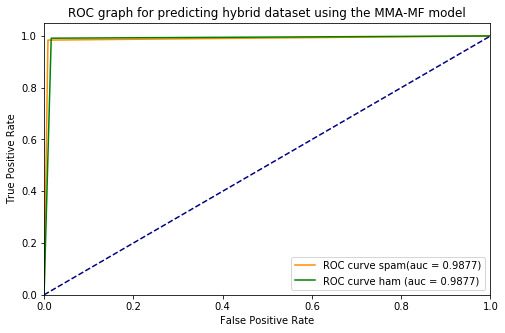

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.6659 - acc: 0.5932
Epoch 2/30
960/960 [==============================] - 0s 123us/step - loss: 0.6039 - acc: 0.9021
Epoch 3/30
960/960 [==============================] - 0s 191us/step - loss: 0.5432 - acc: 0.9797
Epoch 4/30
960/960 [==============================] - 0s 180us/step - loss: 0.4793 - acc: 0.9828
Epoch 5/30
960/960 [==============================] - 0s 178us/step - loss: 0.4129 - acc: 0.9828
Epoch 6/30
960/960 [==============================] - 0s 205us/step - loss: 0.3458 - acc: 0.9833
Epoch 7/30
960/960 [==============================] - 0s 175us/step - loss: 0.2832 - acc: 0.9833
Epoch 8/30
960/960 [==============================] - 0s 197us/step - loss: 0.2299 - acc: 0.9833
Epoch 9/30
960/960 [==============================] - 0s 202us/step - loss: 0.1887 - acc: 0.9833
Epoch 10/30
960/960 [==============================] - 0s 156us/step - loss: 0.1580 - acc: 0.9833
Epoch 11/30
960/960 [==========

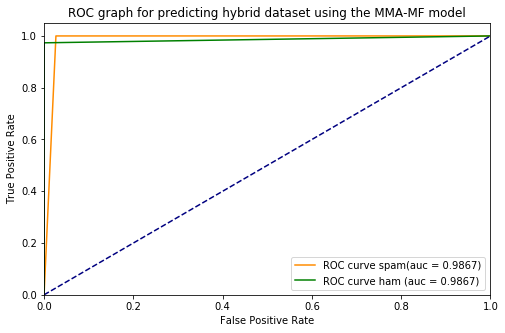

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.6632 - acc: 0.6443
Epoch 2/30
960/960 [==============================] - 0s 141us/step - loss: 0.6069 - acc: 0.9547
Epoch 3/30
960/960 [==============================] - 0s 187us/step - loss: 0.5595 - acc: 0.9839
Epoch 4/30
960/960 [==============================] - 0s 171us/step - loss: 0.5065 - acc: 0.9839
Epoch 5/30
960/960 [==============================] - 0s 202us/step - loss: 0.4463 - acc: 0.9839
Epoch 6/30
960/960 [==============================] - 0s 174us/step - loss: 0.3815 - acc: 0.9839
Epoch 7/30
960/960 [==============================] - 0s 183us/step - loss: 0.3172 - acc: 0.9839
Epoch 8/30
960/960 [==============================] - 0s 186us/step - loss: 0.2594 - acc: 0.9844
Epoch 9/30
960/960 [==============================] - 0s 161us/step - loss: 0.2117 - acc: 0.9844
Epoch 10/30
960/960 [==============================] - 0s 194us/step - loss: 0.1747 - acc: 0.9844
Epoch 11/30
960/960 [==========

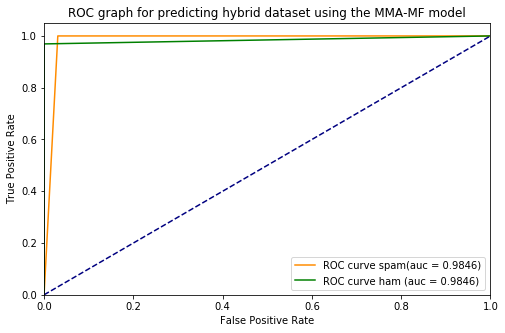

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.7156 - acc: 0.4484
Epoch 2/30
960/960 [==============================] - 0s 169us/step - loss: 0.6681 - acc: 0.6625
Epoch 3/30
960/960 [==============================] - 0s 118us/step - loss: 0.6321 - acc: 0.8760
Epoch 4/30
960/960 [==============================] - 0s 147us/step - loss: 0.5950 - acc: 0.9630
Epoch 5/30
960/960 [==============================] - 0s 126us/step - loss: 0.5513 - acc: 0.9823
Epoch 6/30
960/960 [==============================] - 0s 173us/step - loss: 0.4983 - acc: 0.9823
Epoch 7/30
960/960 [==============================] - 0s 178us/step - loss: 0.4374 - acc: 0.9823
Epoch 8/30
960/960 [==============================] - 0s 179us/step - loss: 0.3730 - acc: 0.9823
Epoch 9/30
960/960 [==============================] - 0s 215us/step - loss: 0.3106 - acc: 0.9823
Epoch 10/30
960/960 [==============================] - 0s 170us/step - loss: 0.2551 - acc: 0.9823
Epoch 11/30
960/960 [==========

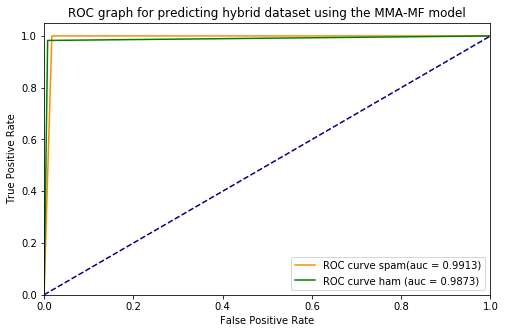

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.6809 - acc: 0.6224
Epoch 2/30
960/960 [==============================] - 0s 157us/step - loss: 0.6386 - acc: 0.7380
Epoch 3/30
960/960 [==============================] - 0s 163us/step - loss: 0.5982 - acc: 0.9557
Epoch 4/30
960/960 [==============================] - 0s 181us/step - loss: 0.5506 - acc: 0.9854
Epoch 5/30
960/960 [==============================] - 0s 175us/step - loss: 0.4945 - acc: 0.9859
Epoch 6/30
960/960 [==============================] - 0s 176us/step - loss: 0.4318 - acc: 0.9859
Epoch 7/30
960/960 [==============================] - 0s 165us/step - loss: 0.3636 - acc: 0.9865
Epoch 8/30
960/960 [==============================] - 0s 194us/step - loss: 0.2986 - acc: 0.9865
Epoch 9/30
960/960 [==============================] - 0s 178us/step - loss: 0.2424 - acc: 0.9865
Epoch 10/30
960/960 [==============================] - 0s 198us/step - loss: 0.1970 - acc: 0.9865
Epoch 11/30
960/960 [==========

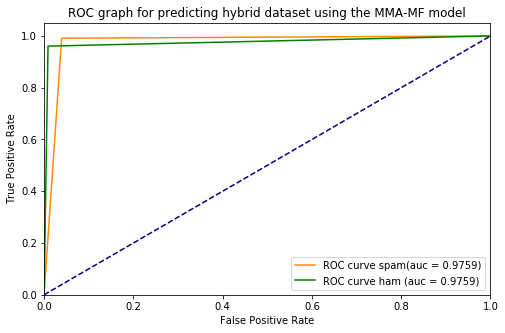

***************************Accuracy****************************
The all of acc score:  [98.75, 98.75, 98.33333333333333, 98.95833333333334, 97.5]
The average score: 98.4583% (+/- 0.5204%)
---------------------------F1-Score-----------------------------
The all of f1_scores score:  [0.9874823971209512, 0.9874369667254104, 0.9832589285714286, 0.9894815276911347, 0.9749565217391305]
The average score: 0.9845% (+/- 0.0052%)
+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++
The all of recall_scores score:  [0.9876521739130435, 0.9867256637168141, 0.9846153846153847, 0.991304347826087, 0.9758901818688592]
The average score: 0.9852% (+/- 0.0051%)


In [15]:
from keras.optimizers import Adagrad,Adam,RMSprop
seed = 42
np.random.seed(seed)

# 定义 K-fold 交叉验证 参数
kfold= KFold(n_splits=5, shuffle=True, random_state=seed)
n_classes=2
flag_nn=1
f1_scores=[]
recall_scores=[]
cvscores=[]
for train, test in kfold.split(hybrid_data, y_text_train):
    #accuracy_scores = []
    model = Sequential()  
    model.add(Dense(64, input_shape=(4,)))
    model.add(Activation('relu'))  
    model.add(Dense(32))
    model.add(Activation('relu'))  
    model.add(Dense(2))
    model.add(Activation('sigmoid')) 
    sgd = SGD(lr=0.01)
    model.compile(loss='binary_crossentropy',  optimizer=sgd,
                  metrics=['accuracy'])  

    model.fit(hybrid_data[train], y_text_train[train], batch_size=16, epochs=30,verbose=1)
    model.save("/home/aqts/yangHong/first-spam-experiment/h5_model/hybrid_for_noequal"+str(flag_nn)+".h5")
    
    
#     model.fit(x_train[train], y_train[train], epochs=32, batch_size=20, verbose=1)
#     model.save("/home/aqts/yangHong/first-spam-experiment/h5_model/text_lstm_model_k_flod"+str(flag)+".h5")
    # 评估模型
    # accuracy
    scores = model.evaluate(hybrid_data[test], y_text_train[test], verbose=0)
#     print("%s: %s %.2f%%" % (model.metrics_names[1], ':', scores[1]*100))
    cvscores.append(scores[1]*100)
    y_pred_score=y_pred=model.predict(hybrid_data[test], 16)
    #get precision
    for i in range(len(y_pred)):
        if(y_pred[i][0]>0.5):
            y_pred[i][0]=1
        else:
            y_pred[i][0]=0
        if(y_pred[i][1]>0.5):
            y_pred[i][1]=1
        else:
            y_pred[i][1]=0
    print("---------------------------Precision-----------------------------")
    print(classification_report(y_text_train[test],y_pred))
    #f1-score
    f1_scores.append(f1_score(y_text_train[test],y_pred,average = 'macro'))
    #recall-score
    recall_scores.append(recall_score(y_text_train[test],y_pred,average = 'macro'))
    #get auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_text_train[test][:, i], y_pred_score[:, i])    
        roc_auc[i] = auc(fpr[i], tpr[i])   

    # #Plot of a ROC curve for a specific class
    plt.rcParams['figure.figsize']=(8,5)
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve spam(auc = %0.4f)' % roc_auc[1])
    plt.plot(fpr[0], tpr[0], color='green', label='ROC curve ham (auc = %0.4f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC graph for predicting hybrid dataset using the MMA-MF model')
    plt.legend(loc="lower right")
    plt.savefig("/home/aqts/yangHong/first-spam-experiment/experiment_result_roc/ROC_graph_for_hybrid_dataset_noequal"+str(flag_nn)+".png")
    plt.show()
    flag_nn=flag_nn+1

print("***************************Accuracy****************************")
print("The all of acc score: " ,(cvscores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("---------------------------F1-Score-----------------------------")
print("The all of f1_scores score: " ,(f1_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
print("+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++")
print("The all of recall_scores score: " ,(recall_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(recall_scores), np.std(recall_scores)))

In [16]:
from sklearn.metrics import classification_report
from sklearn import preprocessing   
import numpy as np
# y_hybrid_pred = model.predict(hybrid_data_test,batch_size=32, verbose=0)
y_text_train_new=[]
for i in range(len(y_text_train)):
    if(y_text_train[i][0]>0.5):
        y_text_train_new.append(1)
    else:
        y_text_train_new.append(0)
y_text_train_new=np.array(y_text_train_new)
print(y_text_train_new.shape)

(1200,)


In [17]:
print(y_text_train_new.shape)
print(hybrid_data.shape)

(1200,)
(1200, 4)


In [18]:
'''
SVM=Support Vector Machine 是支持向量
SVC=Support Vector Classification就是支持向量机用于分类，
SVC=Support Vector Regression.就是支持向量机用于回归分析
'''

'''
算法（python-sklearn）
SVM模型的几种
svm.LinearSVC Linear Support Vector Classification.
svm.LinearSVR Linear Support Vector Regression.
svm.NuSVC Nu-Support Vector Classification.
svm.NuSVR Nu Support Vector Regression.
svm.OneClassSVM Unsupervised Outlier Detection.
svm.SVC C-Support Vector Classification.
svm.SVR Epsilon-Support Vector Regression.
'''
#svm  参数选择 开始调优使用GridSearchCV找到,最优参数

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# parameters = {'gamma': [0.001, 0.01, 0.1, 1,10],}
# #n_jobs =-1使用全部CPU并行多线程搜索
# gs = GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0)
# gs.fit(hybrid_data, y_text_train_new) #Run fit with all sets of parameters.
parameters = {'gamma': [0,0.001, 0.01], 'C':[1,5,10]}
gs = GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 1, n_jobs = -1)
gs.fit(hybrid_data, y_text_train_new)
print('最优参数: ',gs.best_params_)
print('最佳性能: ', gs.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


最优参数:  {'C': 1, 'gamma': 0.001}
最佳性能:  0.9841666666666666


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.1s finished


In [19]:
# svc get performance
seed = 42
np.random.seed(seed)

# 定义 K-fold 交叉验证 参数
kfold= KFold(n_splits=5, shuffle=True, random_state=seed)
n_classes=2
f1_scores=[]
recall_scores=[]
cvscores=[]
for train, test in kfold.split(hybrid_data, y_text_train_new):
    svc_model=SVC(gamma= 0.001,C=1)     #SVC(gamma=10,C=1)
    svc_model.fit(hybrid_data[train],y_text_train_new[train])
    
    # 评估模型
    # accuracy
    scores = svc_model.score(hybrid_data[test], y_text_train_new[test])
    cvscores.append(scores*100)
    y_pred_score=y_pred=svc_model.predict(hybrid_data[test])
    print("---------------------------Precision-----------------------------")
    print(classification_report(y_text_train_new[test],y_pred))
    #f1-score
    f1_scores.append(f1_score(y_text_train_new[test],y_pred,average = 'macro'))
    #recall-score
    recall_scores.append(recall_score(y_text_train_new[test],y_pred,average = 'macro'))

print("***************************Accuracy****************************")
print("The all of acc score: " ,(cvscores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("---------------------------F1-Score-----------------------------")
print("The all of f1_scores score: " ,(f1_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
print("+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++")
print("The all of recall_scores score: " ,(recall_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(recall_scores), np.std(recall_scores)))

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.98      0.98      0.98       115

   micro avg       0.98      0.98      0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.97      0.99       113

   micro avg       0.99      0.99      0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.97      

In [24]:
#knn 参数选择 开始调优使用GridSearchCV找到,最优参数
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#设置k的范围
k_range = list(range(1,5))
leaf_range = list(range(1,3))
weight_options = ['uniform','distance']
algorithm_options = ['auto','ball_tree','kd_tree','brute']
param_gridknn = dict(n_neighbors = k_range,weights = weight_options,algorithm=algorithm_options,leaf_size=leaf_range)
gridKNN = GridSearchCV(KNeighborsClassifier(),param_gridknn,cv=5,scoring='accuracy',verbose=1)
gridKNN.fit(hybrid_data, y_text_train_new)
print('best score is:',str(gridKNN.best_score_))
print('best params are:',str(gridKNN.best_params_))


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best score is: 0.9816666666666667
best params are: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    6.2s finished


In [25]:
# knn get performance
seed = 42
np.random.seed(seed)

# 定义 K-fold 交叉验证 参数
kfold= KFold(n_splits=5, shuffle=True, random_state=seed)
n_classes=2
flag_nn=1
f1_scores=[]
recall_scores=[]
cvscores=[]
for train, test in kfold.split(hybrid_data, y_text_train_new):
    knn_model=KNeighborsClassifier(algorithm="auto",leaf_size=1,n_neighbors=1,weights="uniform")     #SVC(gamma=10,C=1)
    knn_model.fit(hybrid_data[train],y_text_train_new[train])
    
    # 评估模型
    # accuracy
    scores = knn_model.score(hybrid_data[test], y_text_train_new[test])
    cvscores.append(scores*100)
    y_pred_score=y_pred=knn_model.predict(hybrid_data[test])
    print("---------------------------Precision-----------------------------")
    print(classification_report(y_text_train_new[test],y_pred))
    #f1-score
    f1_scores.append(f1_score(y_text_train_new[test],y_pred,average = 'macro'))
    #recall-score
    recall_scores.append(recall_score(y_text_train_new[test],y_pred,average = 'macro'))


print("***************************Accuracy****************************")
print("The all of acc score: " ,(cvscores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("---------------------------F1-Score-----------------------------")
print("The all of f1_scores score: " ,(f1_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
print("+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++")
print("The all of recall_scores score: " ,(recall_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(recall_scores), np.std(recall_scores)))

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       125
           1       0.96      0.99      0.97       115

   micro avg       0.97      0.97      0.97       240
   macro avg       0.97      0.98      0.97       240
weighted avg       0.98      0.97      0.98       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       127
           1       0.99      0.98      0.99       113

   micro avg       0.99      0.99      0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.97      

In [26]:
from sklearn.model_selection import GridSearchCV #网格搜索模块
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()#候选参数：树的数量，最大树深，选择的变量树
parameters = {'n_estimators':np.array([25,50,100]),'max_depth':np.array([2,3,4,5,6,7,8])}#网格参数搜索，输入之前的模型流程pipe_process,候选参数parameters，并且设置5折交叉验证
gs_RF = GridSearchCV(clf,parameters,verbose=2,refit=True,cv=5) #设置备选参数组
gs_RF.fit(hybrid_data, y_text_train_new) #模型训练过程
# print(gs_RF.best_params_,gs_RF.best_score_) #查看最佳参数和评分（准确度）
print('best score is:',str(gs_RF.best_score_))
print('best params are:',str(gs_RF.best_params_))
#最佳参数的KNN建模对预测数据预测效果）
# print('The Accuracy of GradientBoostingClassifier model with best parameter and MinMaxScaler is',gs_RF.score(horse_test_x,horse_test_y))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ..................... max_depth=2, n_estimators=25, total=   0.0s
[CV] max_depth=2, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] .

[CV] ..................... max_depth=6, n_estimators=25, total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV] ..................... max_depth=6, n_estimators=25, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:   14.6s finished


In [27]:
# random forest get performance
seed = 42
np.random.seed(seed)

# 定义 K-fold 交叉验证 参数
kfold= KFold(n_splits=5, shuffle=True, random_state=seed)
n_classes=2
flag_nn=1
f1_scores=[]
recall_scores=[]
cvscores=[]
for train, test in kfold.split(hybrid_data, y_text_train_new):
    rfc_model=RandomForestClassifier(max_depth=3,n_estimators=25)     #SVC(gamma=10,C=1)
    rfc_model.fit(hybrid_data[train],y_text_train_new[train])
    
    # 评估模型
    # accuracy
    scores = rfc_model.score(hybrid_data[test], y_text_train_new[test])
    cvscores.append(scores*100)
    y_pred_score=y_pred=rfc_model.predict(hybrid_data[test])
    print("---------------------------Precision-----------------------------")
    print(classification_report(y_text_train_new[test],y_pred))
    #f1-score
    f1_scores.append(f1_score(y_text_train_new[test],y_pred,average = 'macro'))
    #recall-score
    recall_scores.append(recall_score(y_text_train_new[test],y_pred,average = 'macro'))


print("***************************Accuracy****************************")
print("The all of acc score: " ,(cvscores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("---------------------------F1-Score-----------------------------")
print("The all of f1_scores score: " ,(f1_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
print("+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++")
print("The all of recall_scores score: " ,(recall_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(recall_scores), np.std(recall_scores)))

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.98      0.98      0.98       115

   micro avg       0.98      0.98      0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.98      0.99       113

   micro avg       0.99      0.99      0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       110
           1       1.00      0.98      